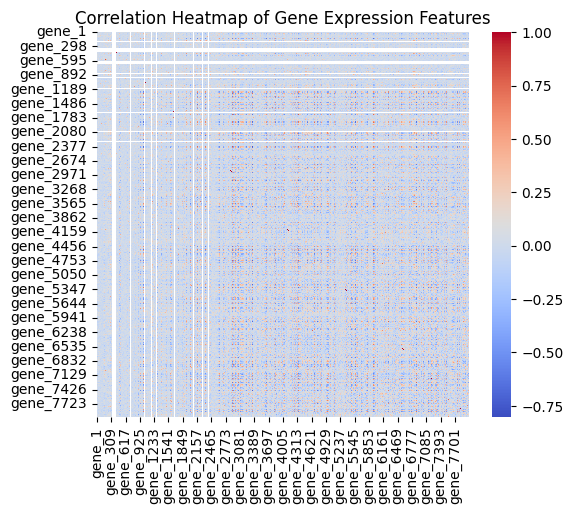

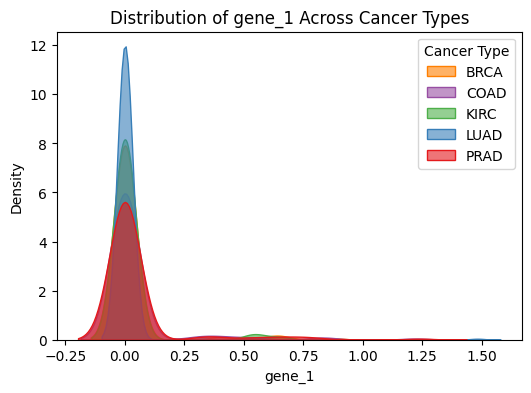

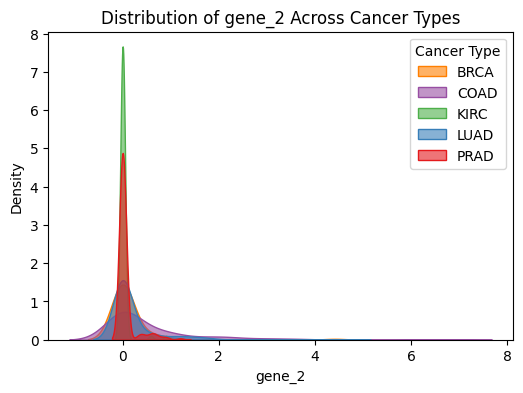

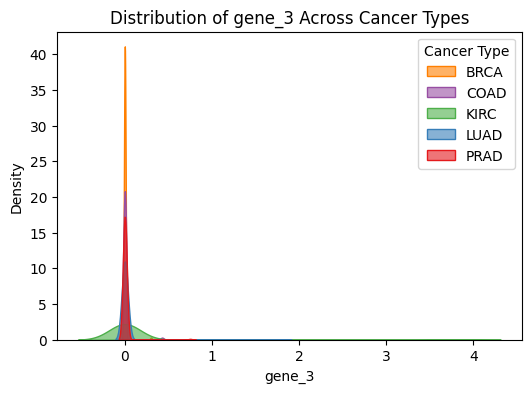

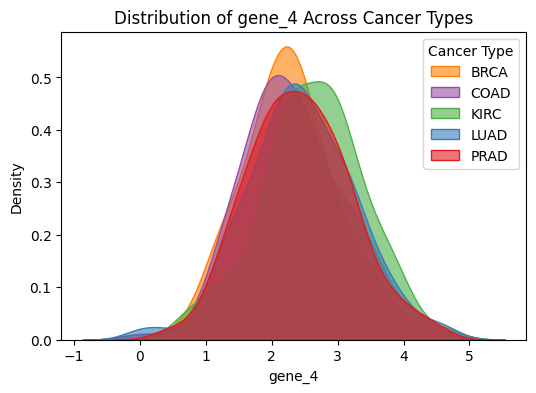

/var/folders/8s/jlpdmgb173xdwyc1p0l1wr5r0000gn/T/ipykernel_65278/4211243221.py:43: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X, x=feature, hue=y, fill=True, common_norm=False, palette='Set1', alpha=0.6)


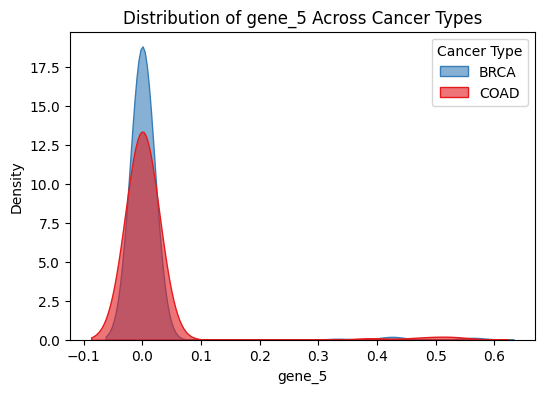

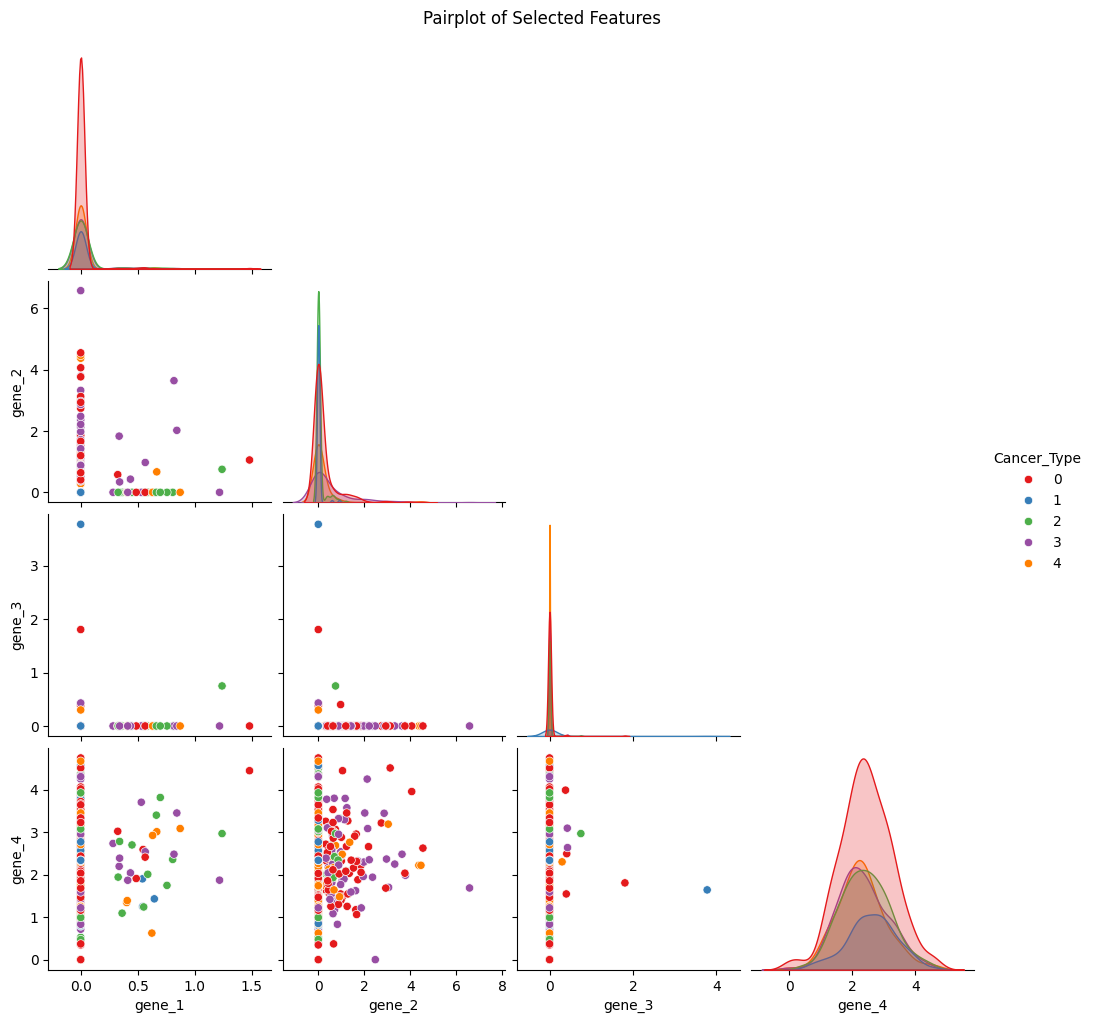

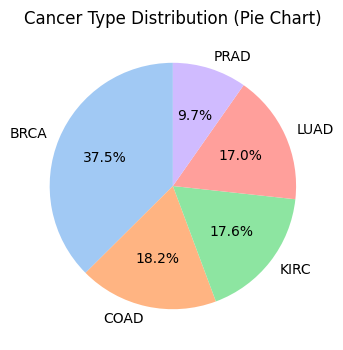

/var/folders/8s/jlpdmgb173xdwyc1p0l1wr5r0000gn/T/ipykernel_65278/4211243221.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


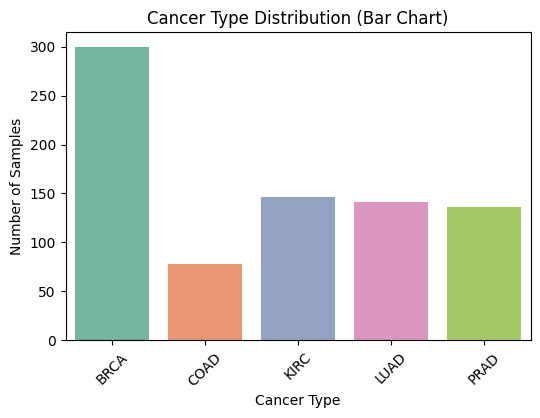

In [3]:
import zipfile
import io
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Download and Load Data
file_url = "https://github.com/albertegi/Multiclass-Cancer-Classification-Using-Gene-Expression-Data/blob/main/cancer_gene_expression.zip?raw=true"
response = requests.get(file_url)
response.raise_for_status()
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('cancer_gene_expression.csv') as f:
        dataframe = pd.read_csv(f)

# Step 2: Separate Features and Target
X = dataframe.iloc[:, :-1]  # Features
y = dataframe.iloc[:, -1]   # Target (Cancer Type)

# Step 3: Encode Target Variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Add target column to the dataframe for visualizations
dataframe['Cancer_Type'] = y_encoded

# Step 4: Visualizations

# 1. Correlation Heatmap
plt.figure(figsize=(6, 5))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Gene Expression Features')
plt.show()

# 2. Feature Distributions
# Select a subset of features for demonstration (e.g., first 5 columns)
selected_features = X.columns[:5]
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=X, x=feature, hue=y, fill=True, common_norm=False, palette='Set1', alpha=0.6)
    plt.title(f"Distribution of {feature} Across Cancer Types")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Cancer Type', labels=label_encoder.classes_)
    plt.show()

# 3. Pairplot of Selected Features
# Select a small subset of features and add the target variable
selected_features = list(X.columns[:4])  # Pick the first 4 features for pairplot
pairplot_data = dataframe[selected_features + ['Cancer_Type']]
sns.pairplot(pairplot_data, hue='Cancer_Type', palette='Set1', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# 4. Class Distribution
# Pie Chart
plt.figure(figsize=(4, 4))
class_counts = dataframe['Cancer_Type'].value_counts()
plt.pie(class_counts, labels=label_encoder.classes_, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Cancer Type Distribution (Pie Chart)')
plt.show()

# Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Cancer Type Distribution (Bar Chart)')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()
